# Hands On 2 - Image Processing
---
## Personal Identity
| Subject         | Results            |
|-----------------|--------------------|
| Nama Mahasiswa  | Kevin Simorangkir  |
| Kelas           | R                  |
| NIM             | 121140150          |

## Questions Instructions
1. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini. Editlah sebuah foto yang terdapat
   wajah anda, namun kali ini tidak dengan photoshop, melainkan dengan python. Lakukan penyesuaian berikut ini.
   - Lakukan resize untuk foto anda menjadi 1080 pada dimension terpanjangnya. Gunakan cv2.resize untuk melakukan resize.
   - Buatlah frame berwarna kuning (RGB value: 255, 255, 0) sebesar 25 pixel + dua digit terakhir NIM anda pada setiap sisi foto anda. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM anda.
   - Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin
   - Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin
   - Tampilkanlah histogram dari foto tersebut
   - Jelaskan hasil eksperimen anda

2. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini
   - Convert image dari RGB menjadi Grayscale
   - Tampilkan histogram dari foto tersebut
   - Lakukanlah normalisasi level intensitas warna pada foto tersebut. Aturlah agar intensitas warna terendah menjadi 0, dan intensitas warna tertinggi menjadi 255
   - Tampilkan histogram dari hasil normalisasi
   - Buatlah pixel-art dari foto tersebut. Caranya adalah dengan mengubah intensitas warna menjadi 0 atau 255. Jika intensitas warna < 128, maka ubah menjadi 0, dan jika intensitas warna >= 128, maka ubah menjadi 255. Tunjukkan hasilnya

3. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini
   - Naikkan kecerahan (brightnes) pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menaikkan kecerahan. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
   - Turunkan saturasi warna pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan saturasi warna. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut
   - Turunkan kontras pada foto tersebut. Anda tidak boleh menggunakan library cv2 untuk menurunkan kontras. Anda hanya boleh menggunakan operasi matriks. Jelaskan langkah-langkah yang anda lakukan. Tampilkan histogram dari foto tersebut

---

### Question - 01
1. Dengan foto anda sendiri, lakukanlah eksperimen berikut ini. Editlah sebuah foto yang terdapat
   wajah anda, namun kali ini tidak dengan photoshop, melainkan dengan python. Lakukan penyesuaian berikut ini.
   - Lakukan resize untuk foto anda menjadi 1080 pada dimension terpanjangnya. Gunakan cv2.resize untuk melakukan resize.
   - Buatlah frame berwarna kuning (RGB value: 255, 255, 0) sebesar 25 pixel + dua digit terakhir NIM anda pada setiap sisi foto anda. Frame tersebut akan mengelilingi foto setebal 25 pixel + dua digit terakhir NIM anda.
   - Aturlah intensitas warna pada channel merah di bagian tengah (50 - 150), dan naikkan sebesar 20 poin
   - Turunkanlah intensitas warna pada channel biru di atas (200- 250), dan turunkan sebesar 20 poin
   - Tampilkanlah histogram dari foto tersebut
   - Jelaskan hasil eksperimen anda

### Answer - 01

1. Langkah pertama adalah menyiapkan pustaka yang akan digunakan. Dalam hal ini menggunakan 3 (tiga) pustaka yaitu `numpy` , `matplotlib.pyplot` , `cv2` .

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

2. Memanggil gambar yang akan dieksekusi dalam kasus ini.

In [11]:
gambar = cv2.imread('Image/Kevin1.jpg')

3. Melakukan _resize_ dengan memanggil beberapa fungsi dengan definisi dari `tinggi` dan `lebar` .

In [12]:
tinggi, lebar = gambar.shape[:2]
if tinggi > lebar:
    tinggi_baru = 1080
    lebar_baru = int(tinggi_baru / tinggi * lebar)
else:
    lebar_baru = 1080
    tinggi_baru = int(lebar_baru / lebar * tinggi)

4. Melakukan definisi dari gambar_baru yang terdiri dari lebar_baru dan tinggi_baru.

In [13]:
gambar_baru = cv2.resize(gambar, (lebar_baru, tinggi_baru))

5. Membuat sebuah `variable` baru untuk penjelasan sebuah bingkai berwarna kuning yang dijelaskan dalam `variable` bingkai_kuning.

In [14]:
bingkai_tipis = 75 #25 + 50 = 75
bingkai_kuning = cv2.copyMakeBorder(gambar_baru, bingkai_tipis, bingkai_tipis, bingkai_tipis, bingkai_tipis, cv2.BORDER_CONSTANT, value=[0, 255, 255])  # Kuning

6. Membuat sebuah `variable` baru dengan kaitan channel merah yang akan berkorelasi dengan bingkai kuning.

In [15]:
channel_merah = bingkai_kuning[:, :, 2]
mask_merah = (channel_merah >= 50) & (channel_merah <= 150)
bingkai_kuning[:, :, 2][mask_merah] = np.clip(bingkai_kuning[:, :, 2][mask_merah] + 20, 0, 255)

7. Membuat sebuah `variable` baru dengan kaitan channel_biru yang akan berkorelasi dengan bingkai kuning serta mask_biru.

In [16]:
channel_biru = bingkai_kuning[:, :, 0]
mask_biru = (channel_biru >= 200) & (channel_biru <= 250)
bingkai_kuning[:, :, 0][mask_biru] = np.clip(bingkai_kuning[:, :, 0][mask_biru] + 20, 0, 255)

8. Menampilkan hasil gambar yang telah dimodifikasi melalui beberapa kodingan sebelumnya dan akan menampilkan dengan file **KEVINS_MODIFIKASI.JPG** yang ada di folder _Image_.

In [17]:
cv2.imshow('Gambar Modifikasi', bingkai_kuning)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('Image/KEVINS_MODIFIKASI.JPG', bingkai_kuning)

True

9. Melakukan pemanggilan dalam pustaka `plt` untuk membuat sebuah histogram yang diminta serta mendefinisikan histogram tersebut.

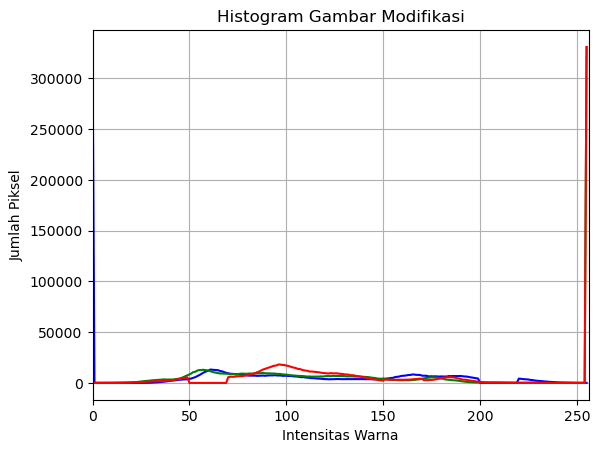

In [18]:
warna = ('b', 'g', 'r')
for i, col in enumerate(warna):
    histogram = cv2.calcHist([bingkai_kuning], [i], None, [256], [0, 256])
    plt.title('Histogram Gambar Modifikasi')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Piksel')
    plt.grid()
    plt.plot(histogram, color=col)
    plt.xlim([0, 256])
plt.show()